## Gradient Descent


## Introduction
Some basics to cover before solving some examples of gradient descent, like necessary imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Numpy provides the ndarray functionality, while matplotlib allows us to plot our graphs.

## Creating lambda functions 
For some examples, we are going to be solving some equations, and using lambda functions is perfect for our use case. Lets represent the function F(x) = x^2 + 5 as a lambda function:

In [2]:
func = lambda x: x**2 + 5

Now when we have a lambda function, we can graphically draw it along a certain x and y axis, for better understanding of how our function looks like. Lets create a simple function which takes a formula, which will be our lambda function defined above, and some range for x.

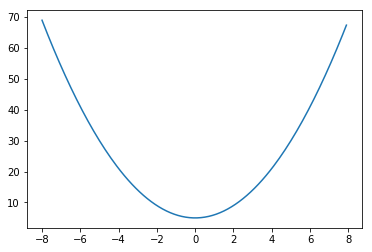

In [3]:
def draw_func(func, x_range):  
    x = np.array(x_range)
    y = func(x)
    plt.plot(x, y)  
    plt.show()
    
    
# Create arbitrary x range values
x_range = np.arange(-8, 8, 0.1)
draw_func(func, x_range)

Now, lets find the x value of when the minimum occurs. 

In [4]:
# Code modified from Wikipedia

# The starting point on our function's x axis. From our drawn graph above, 5 seems like a good position
cur_x = 5
# This is the step size multiplier, or learning rate
gamma = 0.01
# Set some precision, so we can stop searching for the local minimum when we have a good enough position
precision = 0.00001
previous_step_size = cur_x

# Gradient descent works by taking a derivative of our function, so lets do that
func_der = lambda x: 2*x

def gradient_descent(func, cur_x, gamma, precision, previous_step_size):
    iterations = 0
    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -gamma * func(prev_x)
        previous_step_size = abs(cur_x - prev_x)
        iterations += 1
    print('Iterations: ', iterations)
    return cur_x

min_x = gradient_descent(func_der, cur_x, gamma, precision, previous_step_size)
print("The local minimum occurs at %f" % min_x)

Iterations:  457
The local minimum occurs at 0.000489


Lets add the point to our graph.

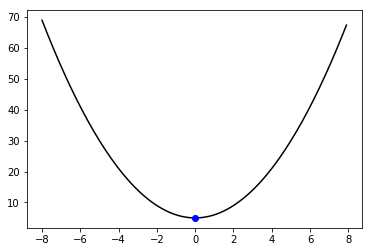

In [5]:
def draw_func_min(func, x_range, local_min_x):  
    x = np.array(x_range)
    y = func(x)
    plt.plot(x, y, 'k', local_min_x, func(local_min_x), 'bo')  
    plt.show()
    
# Create arbitrary x range values
x_range = np.arange(-8, 8, 0.1)
draw_func_min(func, x_range, min_x)

## More examples

Gradient descent works really well for some examples, like the one above. But is has some problems. Lets look at another similar function, like F(x) = x^2 * sin(x) which was shown in the slides:

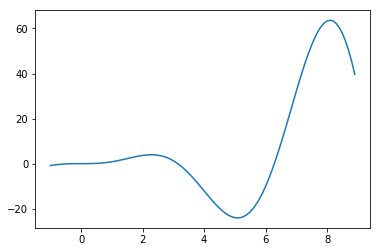

In [6]:
func_2 = lambda x: x**2 * np.sin(x)

draw_func(func_2, np.arange(-1, 9, 0.1))

Here, some of the values we pick have to be chosen carefully, like the starting x value. Lets look at how a bad x value can mess with the algorithm.

In [7]:
cur_x = 1
gamma = 0.01
precision = 0.00001
previous_step_size = cur_x

func_der_2 = lambda x: x * (2 * np.sin(x) + x * np.cos(x))

x_min_2 = gradient_descent(func_der_2, cur_x, gamma, precision, previous_step_size)
print("The local minimum occurs at %f" % x_min_2)

Iterations:  1800
The local minimum occurs at 0.018241


This would place our local minimum like so:

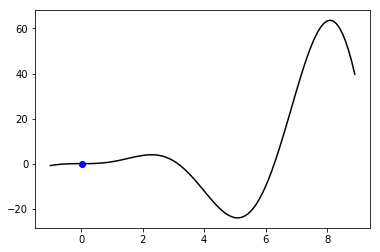

In [8]:
draw_func_min(func_2, np.arange(-1, 9, 0.1), x_min_2)

This does not seem correct, does it? This happens when we pick an unfortunate starting position. The Gradient Descent algorithm always thinks that the best next step is the one going downwards, so in this example it finds the wrong local minimum. We can nudge it in the correct direction by setting the x value to something that would seem to give us the result we want.

Iterations:  54
The local minimum occurs at 5.086965


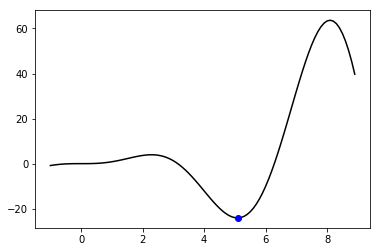

In [9]:
# The curve goind down to what seems to be the local minimum starts at around 2.5, so lets start there
cur_x = 2.5
gamma = 0.01
previous_step_size = cur_x

x_min_better = gradient_descent(func_der_2, cur_x, gamma, precision, previous_step_size)

print("The local minimum occurs at %f" % x_min_better)
draw_func_min(func_2, np.arange(-1, 9, 0.1), x_min_better)

This is a lot better. Now lets look at what happens when we have a too steap learning curve, or gamma:

Iterations:  54
The local minimum occurs at 5.086965


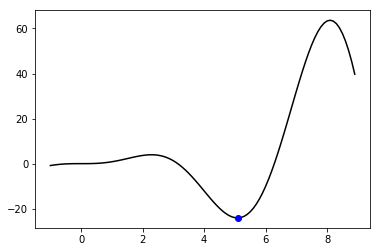

In [12]:
cur_x = 2.5
# what about too small?
gamma = 0.01
previous_step_size = cur_x

x_min_better = gradient_descent(func_der_2, cur_x, gamma, precision, previous_step_size)

print("The local minimum occurs at %f" % x_min_better)
draw_func_min(func_2, np.arange(-1, 9, 0.1), x_min_better)

wat

The Gradient Descent algorithm we have been using stops when the previous step is within the precision we have set. We can also give some value n, and our algorithm will iterate n times to find the minimum.

Iterations:  15
The local minimum occurs at 3.229254


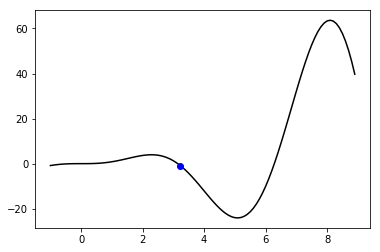

In [14]:
def gradient_descent_n_steps(func, cur_x, gamma, precision, previous_step_size, n):
    for i in range(n):
        prev_x = cur_x
        cur_x += -gamma * func(prev_x)
        previous_step_size = abs(cur_x - prev_x)
    print('Iterations: ', n)
    return cur_x

gamma = 0.01

min_x = gradient_descent_n_steps(func_der_2, cur_x, gamma, precision, previous_step_size, 15)
print("The local minimum occurs at %f" % min_x)
draw_func_min(func_2, np.arange(-1, 9, 0.1), min_x)

With this example above, our n value is to small and the algorithm has not yet found the local minimum. This means when using this method we have to guess what n value will give us a good enough result. Lets give n a higer value:

Iterations:  40
The local minimum occurs at 5.084164


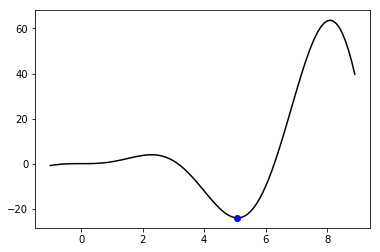

In [15]:
min_x = gradient_descent_n_steps(func_der_2, cur_x, gamma, precision, previous_step_size, 40)
print("The local minimum occurs at %f" % min_x)
draw_func_min(func_2, np.arange(-1, 9, 0.1), min_x)

## Adaptive learning rate
As of now, we have had to guess the learning rate, or gamma, and adjust accordingly for a given function. But we can also implement adaptive learning rate so that for a large amount of functions, this problem we had before has been taken care of. Lets implement this for the function we had in the beginning:

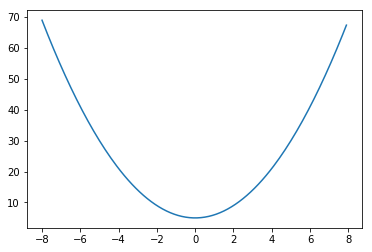

In [16]:
x_range = np.arange(-8, 8, 0.1)
draw_func(func, x_range)

Modify our gradient descent algorithm, so it decreases the gamma value for each iteration. Our example is very simple.

Iterations:  4
The local minimum occurs at 0.000000


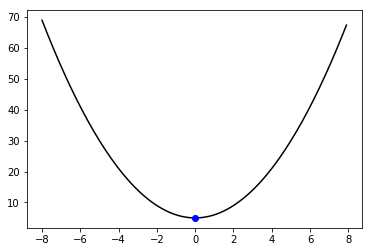

In [17]:
cur_x = 5
# For this example to work, the gamma value has to be sufficiently large to begin with.
gamma = 1.0
precision = 0.00001
previous_step_size = cur_x

func_der = lambda x: 2*x

def gradient_descent_adaptive(func, cur_x, gamma, precision, previous_step_size):
    iterations = 0
    local_gamma = gamma
    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -local_gamma * func(prev_x)
        previous_step_size = abs(cur_x - prev_x)
        iterations += 1
        local_gamma = mod_gamma(iterations)
    print('Iterations: ', iterations)
    return cur_x

def mod_gamma(iteration):
    return gamma / iteration

min_x = gradient_descent_adaptive(func_der, cur_x, gamma, precision, previous_step_size)
print("The local minimum occurs at %f" % min_x)
draw_func_min(func, x_range, min_x)

Lets also look at how this goes with our other function:

Iterations:  14
The local minimum occurs at nan


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sin
  
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in cos
  


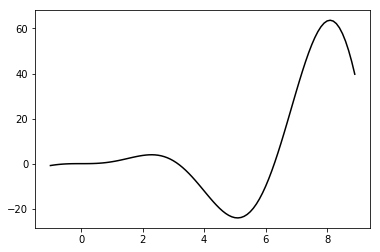

In [19]:
cur_x = 2.5
gamma = 1.0
previous_step_size = cur_x

x_min_better = gradient_descent_adaptive(func_der_2, cur_x, gamma, precision, previous_step_size)

print("The local minimum occurs at %f" % x_min_better)
draw_func_min(func_2, np.arange(-1, 9, 0.1), x_min_better)

What happened is that even though we adapt our learning rate, it happened to slowly compared to the function we are solving. We can decrease the gamma to a slightly smaller value to fix this:

Iterations:  9
The local minimum occurs at 5.086989


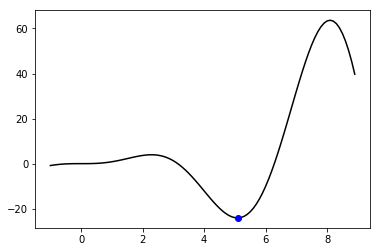

In [20]:
gamma = 0.2

x_min_better = gradient_descent_adaptive(func_der_2, cur_x, gamma, precision, previous_step_size)

print("The local minimum occurs at %f" % x_min_better)
draw_func_min(func_2, np.arange(-1, 9, 0.1), x_min_better)